In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes_prediction_dataset.csv')

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [160]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [161]:
df.max()

gender                       Other
age                           80.0
hypertension                     1
heart_disease                    1
smoking_history        not current
bmi                          95.69
HbA1c_level                    9.0
blood_glucose_level            300
diabetes                         1
dtype: object

In [162]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [163]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [164]:
gender_mapping = {'Female': 0, 'Male': 1, 'Other': 3}
df['gender'] = df['gender'].map(gender_mapping)

df['gender'].value_counts()

gender
0    58552
1    41430
3       18
Name: count, dtype: int64

In [165]:
df['age'] = df['age'].astype('int')

In [166]:
target_col = 'diabetes'

int_cols = df.select_dtypes('integer').columns.tolist()
int_cols.remove(target_col)

int_cols

['gender', 'age', 'hypertension', 'heart_disease', 'blood_glucose_level']

In [167]:
for col in int_cols:
    df[col] = pd.to_numeric(df[col],downcast='integer')

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int8   
 1   age                  100000 non-null  int8   
 2   hypertension         100000 non-null  int8   
 3   heart_disease        100000 non-null  int8   
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int16  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int16(1), int64(1), int8(4), object(1)
memory usage: 3.6+ MB


In [169]:
df.gender.value_counts()

gender
0    58552
1    41430
3       18
Name: count, dtype: int64

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int8   
 1   age                  100000 non-null  int8   
 2   hypertension         100000 non-null  int8   
 3   heart_disease        100000 non-null  int8   
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int16  
 8   diabetes             100000 non-null  int64  
dtypes: float64(2), int16(1), int64(1), int8(4), object(1)
memory usage: 3.6+ MB


In [171]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [172]:
df['smoking_history'] = df['smoking_history'].astype('category')
print(df['smoking_history'].cat.categories)

Index(['No Info', 'current', 'ever', 'former', 'never', 'not current'], dtype='object')


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   gender               100000 non-null  int8    
 1   age                  100000 non-null  int8    
 2   hypertension         100000 non-null  int8    
 3   heart_disease        100000 non-null  int8    
 4   smoking_history      100000 non-null  category
 5   bmi                  100000 non-null  float64 
 6   HbA1c_level          100000 non-null  float64 
 7   blood_glucose_level  100000 non-null  int16   
 8   diabetes             100000 non-null  int64   
dtypes: category(1), float64(2), int16(1), int64(1), int8(4)
memory usage: 3.0 MB


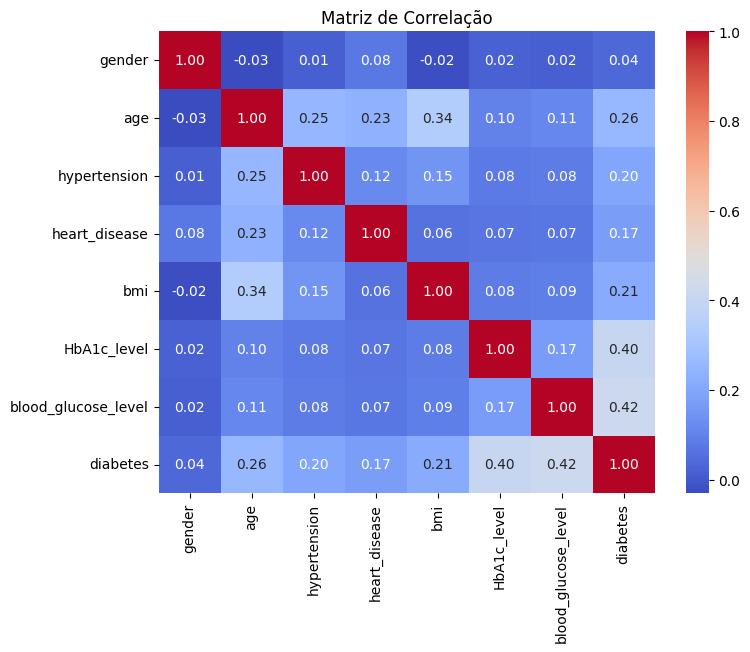

In [174]:
correlation_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

In [175]:
df = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)

In [176]:
X = df.drop('diabetes',axis=1)
y = df['diabetes']

In [177]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [178]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [179]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:,1]

In [180]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, RocCurveDisplay, confusion_matrix
)
from sklearn.metrics import RocCurveDisplay,roc_curve
from sklearn import metrics

print("Sem Balanceamento:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

Sem Balanceamento:
Accuracy: 0.950939393939394
Precision: 0.6990092244619064
Recall: 0.7349137931034483
F1 Score: 0.7165119943967782
ROC AUC: 0.8527415467827048


In [181]:
confusion_matrix(y_test,y_pred)

array([[29335,   881],
       [  738,  2046]])

c:\Users\ifinh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


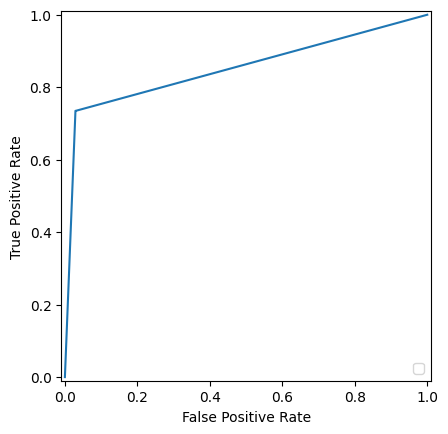

In [182]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


### Irei fazer um undersampling

In [183]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X, y)

In [184]:
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

In [185]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train_rs,y_train_rs)

DecisionTreeClassifier(random_state=0)

In [186]:
y_pred_rs = clf.predict(X_test_rs)
y_pred_rs_proba = clf.predict_proba(X_test_rs)[:,1]

In [187]:
print("Com Balanceamento:")
print("Accuracy:", accuracy_score(y_test_rs, y_pred_rs))
print("Precision:", precision_score(y_test_rs, y_pred_rs))
print("Recall:", recall_score(y_test_rs, y_pred_rs))
print("F1 Score:", f1_score(y_test_rs, y_pred_rs))
print("ROC AUC:", roc_auc_score(y_test_rs, y_pred_rs_proba))

Com Balanceamento:
Accuracy: 0.9837789661319073
Precision: 0.9823614110871131
Recall: 0.9848430169613858
F1 Score: 0.9836006487655433
ROC AUC: 0.9837917092556137


In [188]:
confusion_matrix(y_test_rs,y_pred_rs)

array([[2790,   49],
       [  42, 2729]])

c:\Users\ifinh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


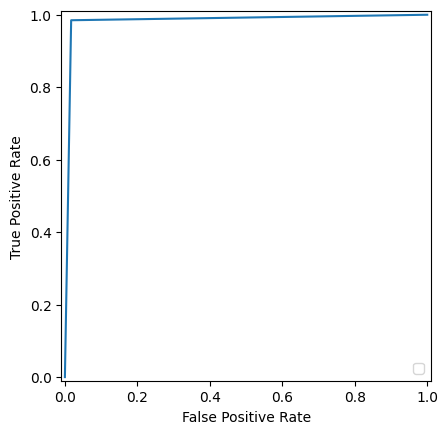

In [190]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_rs, y_pred_rs_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [191]:
print("Sem Balanceamento:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

print('-' * 80)

print("Com Balanceamento:")
print("Accuracy:", accuracy_score(y_test_rs, y_pred_rs))
print("Precision:", precision_score(y_test_rs, y_pred_rs))
print("Recall:", recall_score(y_test_rs, y_pred_rs))
print("F1 Score:", f1_score(y_test_rs, y_pred_rs))
print("ROC AUC:", roc_auc_score(y_test_rs, y_pred_rs_proba))

Sem Balanceamento:
Accuracy: 0.950939393939394
Precision: 0.6990092244619064
Recall: 0.7349137931034483
F1 Score: 0.7165119943967782
ROC AUC: 0.8527415467827048
--------------------------------------------------------------------------------
Com Balanceamento:
Accuracy: 0.9837789661319073
Precision: 0.9823614110871131
Recall: 0.9848430169613858
F1 Score: 0.9836006487655433
ROC AUC: 0.9837917092556137
